<a href="https://colab.research.google.com/github/MohibUllahKhanSherwani/ml_projects/blob/main/Car%20Price%20Prediction/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car_data = pd.read_csv('/content/car data.csv')

In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
#Checking the distribution of categorical data
car_data['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [10]:
car_data['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [11]:
car_data['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [12]:
#Encode this data
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

<ipython-input-12-04cfb98ad340>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-12-04cfb98ad340>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
<ipython-input-12-04cfb98ad340>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
#Seperate data and label
x = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = car_data['Selling_Price']

In [15]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
#Training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 2)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(301, 7) (285, 7) (16, 7)


In [20]:
#First train the model using linear regression
model1 = LinearRegression()

In [21]:
model1.fit(x_train, y_train)

LinearRegression()

In [24]:
#Evaluate LinearRegression Accuracy on training data
training_prediction = model1.predict(x_train)
error_score = metrics.r2_score(y_train, training_prediction)
print('Linear Regression accuracy on training data: ',error_score)

Linear Regression accuracy on training data:  0.879344992302024


In [25]:
test_prediction = model1.predict(x_test)
error_score = metrics.r2_score(y_test, test_prediction)
print('Linear Regression accuracy on test data: ',error_score)

Linear Regression accuracy on test data:  0.8210452486885144


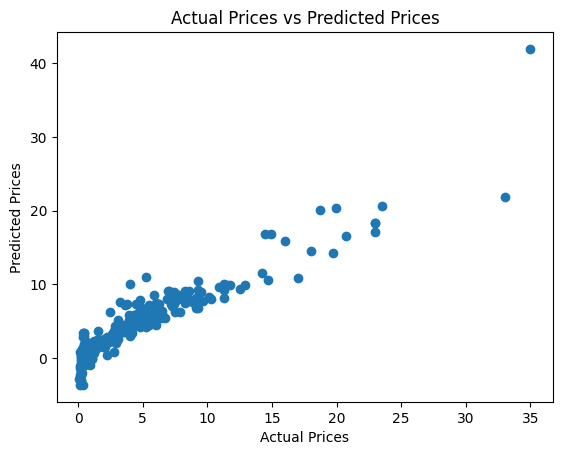

In [26]:
#Visualize predicted vs Actual prices on training data
plt.scatter(y_train, training_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

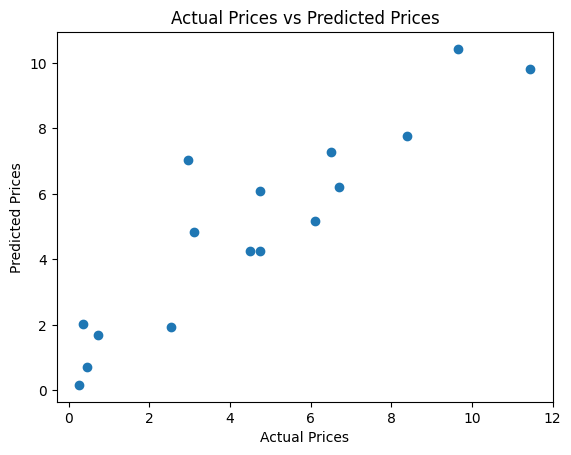

In [27]:
#Visualize predicted vs Actual prices on test data
plt.scatter(y_test, test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [28]:
#Now using Lasso Regression
model2 = Lasso()

In [29]:
model2.fit(x_train, y_train)

Lasso()

In [30]:
training_prediction = model2.predict(x_train)
error_score = metrics.r2_score(y_train, training_prediction)
print('Lasso Regression accuracy on training data: ',error_score)

Lasso Regression accuracy on training data:  0.8419270701259681


In [31]:
test_prediction = model2.predict(x_test)
error_score = metrics.r2_score(y_test, test_prediction)
print('Lasso Regression accuracy on test data: ',error_score)

Lasso Regression accuracy on test data:  0.9218184548926444


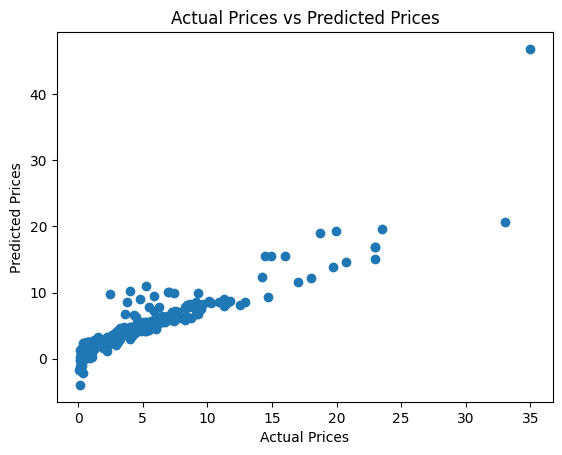

In [32]:
plt.scatter(y_train, training_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

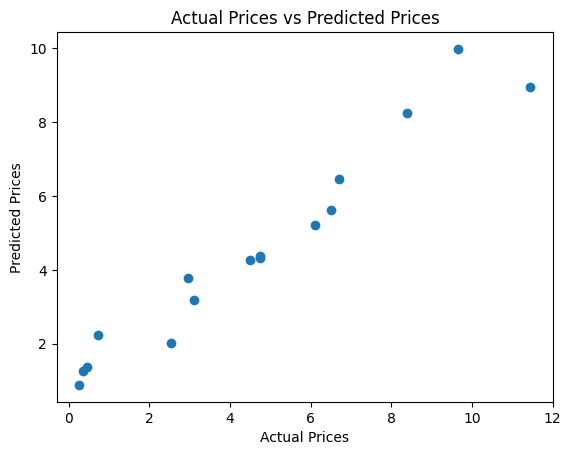

In [35]:
plt.scatter(y_test, test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()